<code>

**ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ**

Что мы сделаем на этом шаге?
→ Посмотрим на данные.

→ Посмотрим, где у нас пропуски.

→ Определим тип признаков.

<code>

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

* **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
* **City** — город, в котором находится ресторан;
* **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
* **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
* **Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
* **Price Range** — диапазон цен в ресторане;
* **Number of Reviews** — количество отзывов о ресторане;
* **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
* **URL_TA** — URL страницы ресторана на TripAdvisor;
* **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.

In [1]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from collections import Counter
import random
from math import fabs

df = pd.read_csv('./main_task_new.csv')
display(df.sample(5))
display(df.info())

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
25130,id_2101,Warsaw,NaN,2102.0,2.0,NaN,2.0,"[['Nothing New', 'could do better'], ['09/24/2...",/Restaurant_Review-g274856-d8866462-Reviews-Pi...,d8866462
8214,id_3190,Lisbon,['Fast Food'],3194.0,3.5,NaN,4.0,"[['Quick bite', 'An original way to eat hambur...",/Restaurant_Review-g189158-d8526035-Reviews-Ha...,d8526035
12029,id_3195,Milan,"['American', 'Fast Food']",3197.0,3.5,$$ - $$$,142.0,"[['Fatto male burger', 'Certainly not ""bene""!'...",/Restaurant_Review-g187849-d8645885-Reviews-Fa...,d8645885
2332,id_11975,Paris,"['Italian', 'Pizza']",11977.0,2.5,$$ - $$$,32.0,"[['A while back', 'Italy in France ??'], ['04/...",/Restaurant_Review-g187147-d1465095-Reviews-Il...,d1465095
26483,id_5395,Milan,"['Bar', 'Pizza', 'Mediterranean', 'Pub']",5398.0,3.0,$$ - $$$,25.0,"[[], []]",/Restaurant_Review-g187849-d8692614-Reviews-Th...,d8692614


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

<code>

Визуально мы можем увидеть, что признаки **'URL_TA', 'ID_TA'** схожи и один содержит в себе другой, кроме того
обычно такие данные не несут в себе полезной информации, генерируются случайным образом. Поэтому просто удалим их.

In [2]:
df = df.drop(['URL_TA', 'ID_TA'], axis = 1)

<code>

**Теперь предстоит:**

Поработать с другими признаками и посмотреть какую информацию мы можем из них извлечь.

In [3]:
# Для удобства работы, переименуем столбцы.
display(df.sample(5))
df.columns = ['restaurant_id', 'city', 'cuisine', 'ranking', 'rating', 'price_range', 
              'number_of_reviews', 'reviews']

display(df.sample(5))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
4933,id_2106,Munich,NaN,2122.0,4.0,NaN,2.0,"[[], []]"
22328,id_6225,Paris,"['Mediterranean', 'Spanish']",6226.0,3.5,$$ - $$$,180.0,"[['Average food, overpriced', 'Dépaysant/exoti..."
31040,id_207,Dublin,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",208.0,4.0,$$ - $$$,469.0,"[['Great!', 'The Italian Connection'], ['01/08..."
18924,id_357,Copenhagen,"['Latin', 'Venezuelan', 'South American', 'Veg...",358.0,4.5,$$$$,63.0,"[['Best food experience in a long time', 'Subl..."
36823,id_1198,Amsterdam,"['Indian', 'Nepali', 'Asian', 'Vegetarian Frie...",1201.0,4.5,$$ - $$$,27.0,"[['Delicious!', 'Nice Indian food, godo servic..."


,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews
23289,id_1234,Barcelona,"['Cafe', 'European', 'Fusion', 'Vegetarian Fri...",1235.0,4.5,$$ - $$$,176.0,"[['J ADORE !', 'Tasty vegan creative food!'], ..."
39633,id_3732,London,"['Mexican', 'Latin', 'Central American', 'Sout...",3739.0,4.0,$$ - $$$,128.0,[['A great little find - out of the hustle an....
28794,id_6419,Paris,['Greek'],6420.0,4.5,$,26.0,[['The Food is fresh and hospitality is the b....
256,id_2361,Brussels,"['Spanish', 'Wine Bar']",2362.0,4.0,$$ - $$$,23.0,"[['Average Spanish food', 'Northern Spanish cu..."
31980,id_1408,Edinburgh,['Cafe'],1409.0,4.0,NaN,2.0,"[['Leith Community Cafe', ""It's ok!""], ['08/08..."


In [4]:
# Сколько вариантов непустых значений встречается в столбце Price Range?

display(df.price_range.value_counts())
display(df.price_range.value_counts().sum())

$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

26114

In [5]:
# Мы видим, что представлено 3 ценовых сегмента, большинство ресторано находится в среднем ценовом сегменте и
# всего у нас есть 26114 заполненных значений из 40000, то есть пропусков довольно много, и надо решить как их заполнить.

# Кроме это, можно сделать три отдельных признака, по трём этим категориям и посмотреть распределение каждого из них.

df['price_range'] = df['price_range'].fillna('$$ - $$$')
df['low_cost'] = df['price_range'].apply(lambda x: 1 if x == '$$ - $$$' else 0)
df['midle_cost'] = df['price_range'].apply(lambda x: 1 if x == '$' else 0)
df['high_cost'] = df['price_range'].apply(lambda x: 1 if x == '$$$$' else 0)
display(df.sample(5))

,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews,low_cost,midle_cost,high_cost
27810,id_4333,Barcelona,NaN,4334.0,5.0,$$ - $$$,NaN,"[['nice place before and after Camp Nou'], ['0...",1,0,0
34207,id_791,Milan,"['Italian', 'American', 'Fast Food']",793.0,4.0,$,385.0,"[['Worth the bite', 'Cheap and Tasty!'], ['11/...",0,1,0
13372,id_10925,Paris,"['Lebanese', 'Mediterranean']",10927.0,4.0,$,NaN,"[[], []]",0,1,0
35927,id_7698,Paris,['French'],7699.0,4.0,$,15.0,"[['Perfect', 'Great service and amazing food']...",0,1,0
19471,id_1156,Amsterdam,"['Dutch', 'Bar', 'European', 'Pub']",1159.0,3.5,$$ - $$$,198.0,"[['Ok but could be better', 'GREAT people watc...",1,0,0


False    40000
Name: city, dtype: int64

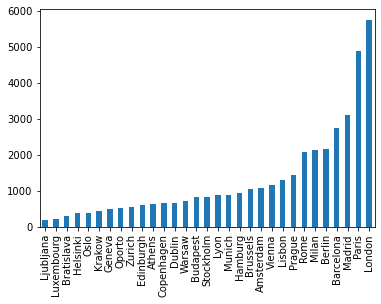

31

In [6]:
# Сколько городов представлено в наборе данных?

display(df.city.isna().value_counts())
df['city'].value_counts(ascending=True).plot(kind='bar')
plt.show()
display(df.city.value_counts().nunique())

# Города представлены корректно и без пропусков. Всего 31 город.

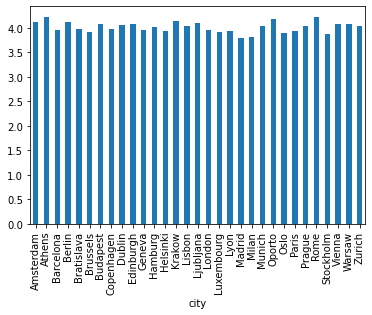

,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews,low_cost,midle_cost,high_cost,city_rating
37582,id_137,Krakow,"['Polish', 'Bar', 'Pub', 'Eastern European']",138.0,4.0,$,212.0,"[['Cheap and the Vodka is an experience', 'Aff...",0,1,0,4.15
19281,id_11142,Paris,NaN,11144.0,3.5,$$ - $$$,40.0,"[['Disappointed', 'Among the best and more aut...",1,0,0,3.94
21285,id_5748,Paris,['French'],5749.0,4.5,$$ - $$$,32.0,"[['Great salads near opera', 'Best salads in P...",1,0,0,3.94
8955,id_6705,Madrid,['Cafe'],6708.0,3.5,$$ - $$$,9.0,"[[], []]",1,0,0,3.80
15330,id_2458,Barcelona,"['Japanese', 'Sushi']",2459.0,4.0,$$ - $$$,50.0,"[['Really good food', 'YI DUÓ'], ['11/30/2017'...",1,0,0,3.96


In [7]:
# Посмотрим, как рейтинг зависит от города.

# Можно посчитать коэффициент города, выведя средний рейтинг ресторанов или медианный
# или и тот и другой для каждого города отдельно.
# И каждое значение города заменить этим коэффициентом, получив таким образов числовой признак.

df.groupby(['city'])['rating'].mean().plot(kind='bar')
plt.show()

# Создадим новый признак, где будет рейтинг города, определюящийся как среднее значение рейтинга ресторанов в этом городе.
df_city_rating = df.groupby(['city'])['rating'].mean()
df['city_rating'] = df['city'].apply(lambda x: round(df_city_rating[x], 2))
display(df.sample(5))

In [8]:
# Посмотрим, какая кухня представлена в наибольшем количестве ресторанов.
count = Counter()
for i in df.index:
    if pd.isnull(df.cuisine[i]):
        count.update(Counter(["'Other'"])) # Пропуски заполним значением other.
    else:
        count.update(Counter(df.cuisine[i].strip('[]').split(', '))) # Разобъём строку на слова разделённые ", "

series_count = pd.Series(dict(count))
display(series_count.sort_values(ascending=False))


def number_of_cuisine(cell):
    '''Функция считает, сколько кухонь представлено в ресторане'''
    return len(cell.split(','))

df_cuisine = df.cuisine.apply(lambda x: 1 if pd.isnull(x) else number_of_cuisine(x)) # Создаём столбец с количеством кухонь.
display('Среднее', df_cuisine.mean()) # Находим среднее.
display('Минимум', df_cuisine.min())
display('Максимум', df_cuisine.max())

# Сделаем новый признак, где будем количество кухонь указывать относительно среднего значения.
df['cuisine_rating'] = df['cuisine'].apply(lambda x: 1 / df_cuisine.mean()if pd.isnull(x) 
                                           else number_of_cuisine(x) / df_cuisine.mean())

display(df['cuisine_rating'].isna().value_counts())
df.sample(5)

'Vegetarian Friendly'    11189
'European'               10060
'Other'                   9283
'Mediterranean'           6277
'Italian'                 5964
                         ...  
'Salvadoran'                 1
'Yunnan'                     1
'Xinjiang'                   1
'Burmese'                    1
'Latvian'                    1
Length: 126, dtype: int64

'Среднее'

2.6224

'Минимум'

1

'Максимум'

21

False    40000
Name: cuisine_rating, dtype: int64

,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews,low_cost,midle_cost,high_cost,city_rating,cuisine_rating
5455,id_1872,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vege...",1873.0,3.5,$$ - $$$,435.0,"[['Both Amazing and Disappointing', 'Quick lun...",1,0,0,3.96,2.28798
24302,id_762,Berlin,"['German', 'Vegetarian Friendly']",763.0,3.5,$$ - $$$,634.0,"[['Positively surprised', 'Great food'], ['12/...",1,0,0,4.12,0.76266
33149,id_151,Brussels,"['French', 'Wine Bar', 'International', 'Europ...",152.0,4.5,$$$$,104.0,"[['Strange taste combinations', 'Wonderfull pl...",0,0,1,3.91,1.52532
7423,id_5730,Paris,"['Lebanese', 'Middle Eastern', 'Mediterranean'...",5731.0,4.5,$,29.0,"[[""Definitely the best restaurant I've EVER b....",0,1,0,3.94,1.52532
27415,id_10388,London,"['Lebanese', 'Mediterranean', 'Middle Eastern']",10397.0,4.5,$,17.0,"[['Nice kebab wraps', 'Day out in Camden'], ['...",0,1,0,3.96,1.14399


In [9]:
def list_of_reviews(cell):
    """Функци делит строку на две, отделяя отзывы от дат"""
    list_review = []
    list_reviews = cell.split('], [')
    for text in list_reviews:
        if '[' in text:
            list_review.append(text.strip('[]'))
        elif ']' in text:
            list_review.append(text.strip('[]'))
    return list_review[0]                # Возвращает первый элемент списка - строку отзывов.

def dates_of_reviews(cell):
    """Функци делит строку на две, отделяя отзывы от дат"""
    list_review = []
    list_reviews = cell.split('], [')
    for text in list_reviews:
        if '[' in text:
            list_review.append(text.strip('[]'))
        elif ']' in text:
            list_review.append(text.strip('[]'))
    return list_review[1]                # Возвращает второй элемент списка - строку дат.

# Записываем в столбец дат произвольную дату, если нет отзывов.
df['dates'] = df.reviews.apply(lambda x: '01/01/2020' if len(x.split("', '")) == 1 else dates_of_reviews(x))
# display(df.sample(5))

# Чтобы удалить строки, без отзывов сначала записываем туда пропуск, потом удаляем.
# df['dates'] = df.reviews.apply(lambda x: None if len(x.split("', '")) == 1 else dates_of_reviews(x))
# df = df.dropna(subset=['dates']) # Удалим строки, где есть пропуски с ревью, оказалось, что модель так работает намного лучше.

# Записываем в столбец ревью 'Other', если нет отзывов.
df['reviews'] = df.reviews.apply(lambda x: 'Other' if len(x.split("', '")) == 1 else list_of_reviews(x))
# display(df.sample(5))

# Записываем в первый столбец первую дату.
df['dates_1'] = df.dates.apply(lambda x: '01/01/2020' if len(x.split("', '")) == 1 
                               else x.split("', '")[0].strip("'"))
df['dates_2'] = df.dates.apply(lambda x: '01/01/2020' if len(x.split("', '")) == 1 
                               else x.split("', '")[1].strip("'"))
# display(df.sample(5))
display(df['dates_1'].count()) # Проверили, что нет пропусков
display(df['dates_2'].count())

df.dates_1 = pd.to_datetime(df.dates_1) # Переводим в формат datetime для работы с датами.
df.dates_2 = pd.to_datetime(df.dates_2)

df['dates'] = df.dates_1 - df.dates_2
df['dates'] = df['dates'].apply(lambda x: fabs(int(str(x).split(" ")[0])))  # Оставляем числовую часть (дни), по модулю.
df['dates'] = df['dates'].apply(lambda x: random.randint(0, 500) if x == 0 else x)

display(df['dates'].value_counts())
display(df.sample(5))

40000

40000

1.0       690
2.0       544
3.0       514
4.0       458
5.0       435
         ... 
1432.0      1
1083.0      1
843.0       1
1216.0      1
2125.0      1
Name: dates, Length: 1228, dtype: int64

,restaurant_id,city,cuisine,ranking,rating,price_range,number_of_reviews,reviews,low_cost,midle_cost,high_cost,city_rating,cuisine_rating,dates,dates_1,dates_2
33832,id_3242,Lisbon,NaN,3246.0,3.5,$$ - $$$,10.0,"'Alright', 'Pao de Deus is my new favorite'",1,0,0,4.05,0.38133,463.0,2017-10-13,2016-07-07
7619,id_12309,London,NaN,12319.0,4.0,$$ - $$$,4.0,"'Delicious and very cheap', 'Very convenient o...",1,0,0,3.96,0.38133,138.0,2018-01-08,2017-08-23
27246,id_2218,Madrid,"['Mediterranean', 'Spanish']",2220.0,3.5,$$ - $$$,226.0,"""Didn't eat but nice for a drink"", 'Good for s...",1,0,0,3.80,0.76266,2.0,2017-10-21,2017-10-19
8807,id_1336,Berlin,['German'],1338.0,4.5,$$ - $$$,35.0,"'Breakfast was a little underwhelming', 'Excel...",1,0,0,4.12,0.38133,296.0,2017-03-29,2016-06-06
181,id_3552,Lisbon,NaN,3556.0,2.5,$$ - $$$,19.0,"'Steak on the bread', 'Horrible Service'",1,0,0,4.05,0.38133,180.0,2017-07-06,2018-01-02


In [10]:
# Поскольку в городе, где больше ресторанов, сложнее получить высокое место в рейтинге, попробуем
# сделать признак, где поделим место в рейтинге, на количество ресторанов в этом городе.

df_city_ranking = df['city'].value_counts()
display(df_city_ranking.sample(15))
df['city_ranking'] = df['ranking'] / df['city'].apply(lambda x: round(df_city_ranking[x], 2))
df['city_ranking']

# При проверке признак хорошо улучшил качество модели.

Prague        1443
Rome          2078
Lisbon        1300
Athens         628
Dublin         673
Edinburgh      596
Milan         2133
Berlin        2155
Hamburg        949
Luxembourg     210
Brussels      1060
Oporto         513
Paris         4897
Madrid        3108
Geneva         481
Name: city, dtype: int64

0        1.137431
1        1.874390
2        0.061317
3        1.604640
4        0.695409
           ...   
39995    0.234412
39996    1.294874
39997    2.014634
39998    0.881706
39999    2.263010
Name: city_ranking, Length: 40000, dtype: float64

In [11]:
# У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью.
# Для примера я возьму столбец Number of Reviews
df['number_of_reviews_isNAN'] = pd.isna(df['number_of_reviews']).astype('uint8')
df['number_of_reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: number_of_reviews_isNAN, Length: 40000, dtype: uint8

In [12]:
df['number_of_reviews_isNAN'].value_counts()

0    37457
1     2543
Name: number_of_reviews_isNAN, dtype: int64

In [13]:
# Пустые значения в столбце количества отзывов заполним средним значением.
df['number_of_reviews'].fillna(df['number_of_reviews'].mean(), inplace=True)
df['number_of_reviews'].value_counts()
# Заполнение нулями или медианным значением, не принесли существенных изменений в качестве работы модели.

124.82548     2543
2.00000       1916
3.00000       1636
4.00000       1370
5.00000       1181
              ... 
1202.00000       1
1789.00000       1
1423.00000       1
1480.00000       1
995.00000        1
Name: number_of_reviews, Length: 1460, dtype: int64

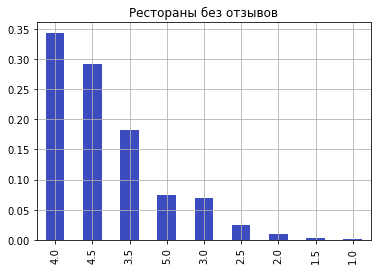

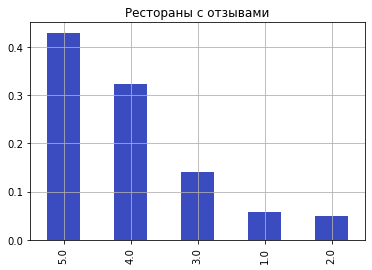

In [14]:
df[df['number_of_reviews_isNAN'] == 0]['rating'].value_counts(normalize=True).plot(kind = 'bar', 
                                                                                   grid = True, 
                                                                                   colormap = 'coolwarm', 
                                                                                   title = 'Рестораны без отзывов')
plt.show()
df[df['number_of_reviews_isNAN'] == 1]['rating'].value_counts(normalize=True).plot(kind = 'bar', 
                                                                                   grid = True, 
                                                                                   colormap = 'coolwarm', 
                                                                                   title = 'Рестораны с отзывами')
plt.show()

# Если посмотреть на график, то можно увидеть, что на графике где количество отзывов = 0(пустые значения NAN), 
# рейтинг распределяется по-другому, больше 35% с рейтингом отлично. А где количество отзывов не равно нулю - только 5%, 
# Возможно это значимый признак. Сделаем 2 категории ресторанов с отзывами и без.

In [15]:
df['no_reviews'] = df['number_of_reviews_isNAN'].apply(lambda x: 1 if x == 1 else 0)
df['exist_reviews'] = df['number_of_reviews_isNAN'].apply(lambda x: 1 if x == 0 else 0)

In [16]:
# Подготовим датасет к обработке, удалим ненужные столбцы.

df = df.drop(['dates_1', 'dates_2', 'cuisine', 'reviews', 'price_range', 'restaurant_id', 'city'], axis = 1)

In [17]:
df.drop(['number_of_reviews_isNAN'], axis = 1, inplace=True)

In [18]:
display(df.sample(20))

,ranking,rating,number_of_reviews,low_cost,midle_cost,high_cost,city_rating,cuisine_rating,dates,city_ranking,no_reviews,exist_reviews
24976,15208.0,3.5,39.00000,1,0,0,3.96,0.76266,12.0,2.641654,0,1
15536,5031.0,4.0,124.82548,1,0,0,4.12,0.38133,422.0,2.334571,1,0
10351,6000.0,4.0,7.00000,1,0,0,3.80,0.38133,138.0,1.930502,0,1
30835,4331.0,4.5,29.00000,0,1,0,4.23,0.76266,183.0,2.084216,0,1
22294,558.0,4.5,7.00000,1,0,0,3.97,0.38133,8.0,1.853821,0,1
30998,7921.0,4.0,32.00000,1,0,0,3.94,0.38133,85.0,1.617521,0,1
11299,1353.0,5.0,3.00000,1,0,0,4.05,0.38133,37.0,1.515118,0,1
27080,480.0,4.5,7.00000,1,0,0,3.89,0.38133,71.0,1.246753,0,1
35428,4917.0,4.0,6.00000,1,0,0,3.82,0.38133,90.0,2.305204,0,1
38692,143.0,4.5,1794.00000,0,1,0,4.03,2.28798,4.0,0.099099,0,1


In [19]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['rating'], axis = 1)  
y = df['rating']

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
      
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)
      
# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактич0еских.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21236799999999997


<AxesSubplot:>

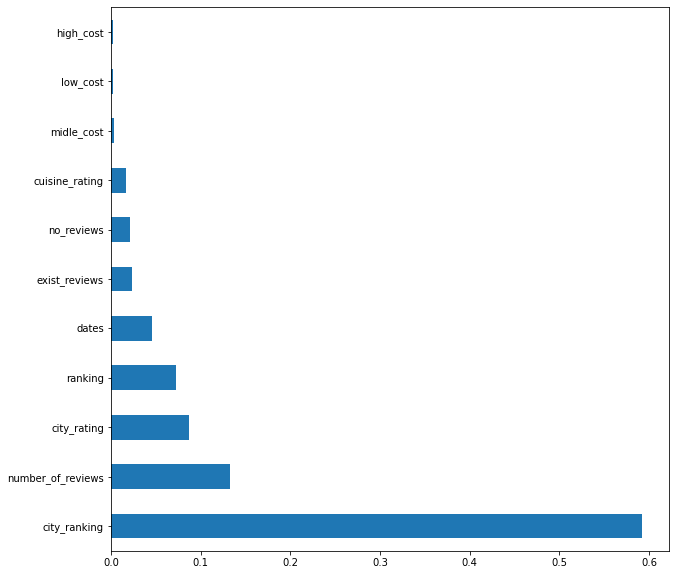

In [20]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')